In [79]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy.stats import shapiro
from scipy.stats import norm
import matplotlib
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from tqdm.notebook import tqdm
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance

In [46]:
df = pd.read_csv('final_dataset.csv')
df['Nyhedsbureau'].value_counts()
df

df['time_group'] = df['time_group'].replace('morning', 1)
df['time_group'] = df['time_group'].replace('day', 2)
df['time_group'] = df['time_group'].replace('evening', 3)

df.rename(columns = {'time_group':'Time_group'}, inplace = True)
df

,Unnamed: 0,Category,Authors,Headline,Time,Live,All_text,Time_group,LIX,first_name,Boy,Girl,Nyhedsbureau,LIX_Headline
0,0,Udland,Mathias Hobolth Østerlund,Efter to år med Taleban er kvindernes sidste f...,2023-08-15 10:38:00,0,['Efter to år ved magten har Taliban gjort det...,2,39.097430,Mathias,1,0,0,50.000000
1,1,Samfund,Signe Marie Frost,"Elever bruger to smuthuller i telefonforbud, f...",2023-08-15 10:38:00,0,['Eleverne vil altid være i stand til at finde...,2,39.229083,Signe,0,1,0,58.000000
2,2,Samfund,"Amanda Nygaard Frisk, Jessica Skovmose",Færre færgeafgange til øer presser landmænd,2023-08-15 09:56:00,0,"['På Fejø, Femø og Askø skal en ny elfærge fin...",2,38.546371,Amanda,0,1,0,56.000000
3,3,Samfund,Amalie Abildgaard,Tidligere islamist: - Man skal 100 procent tag...,2023-08-15 09:01:00,0,"['Al-Qaeda har udsendt en trussel mod Danmark,...",2,42.699095,Amalie,0,1,0,56.454545
4,4,Udland,Livecenter,Seneste nyt om krigen i Ukraine,2023-08-15 09:00:00,1,['Hvad sker der? Rusland har udført et stort l...,2,44.711451,Livecenter,0,0,1,39.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,25718,Vejr,Sebastian Pelt,Fascinerende skyer set over Sydsjælland fredag,2019-03-16 14:47:00,0,['En speciel skytype blev set fredag eftermidd...,2,39.103346,Sebastian,1,0,0,39.333333
25719,25719,Vejr,Sebastian Pelt,Det bliver ved - drivvåd lørdag forude,2019-03-16 11:24:00,0,['Det ekstremt våde martsvejr fortsætter uden ...,2,41.214597,Sebastian,1,0,0,22.666667
25720,25720,Vejr,Anders Brandt,Nyt stormlavtryk truer Danmark i weekenden,2019-03-15 21:00:00,0,['Endnu et kraftigt blæsevejr kan være på vej ...,3,48.185984,Anders,1,0,0,56.000000
25721,25721,Vejr,Anders Brandt,Danmark ramt af storm - den kraftigste i marts...,2019-03-15 16:16:00,0,['Et lille intenst lavtryk passerede fredag Da...,3,50.875861,Anders,1,0,0,29.181818


In [47]:
df.drop(['Authors', 'Time', 'Headline', 'Unnamed: 0', 'All_text', 'first_name'], axis=1, inplace=True)

dummies = pd.get_dummies(df['Category'], prefix='Category')
df = pd.concat([df, dummies], axis=1)
df.drop('Category', axis=1, inplace=True)

df['IsBoy'] = df['Boy']
df.drop(['Boy', 'Girl'], axis=1, inplace=True)

df.drop('Category_Other', axis=1, inplace=True)


"""
#Remove outliers

z_scores = np.abs(stats.zscore(df['LIX']))
# Define a threshold to identify an outlier
threshold = 3
without_outliers_zscore = df[z_scores < threshold]

# 2. Using IQR:

# Calculate Q1, Q3, and IQR
Q1 = df['LIX'].quantile(0.25)
Q3 = df['LIX'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
without_outliers_iqr = df[(df['LIX'] >= lower_bound) & (df['LIX'] <= upper_bound)]
"""


df = df.dropna()
df

,Live,Time_group,LIX,Nyhedsbureau,LIX_Headline,Category_Business,Category_Krimi,Category_Politik,Category_Samfund,Category_Sport,Category_Udland,Category_Underholdning,Category_Vejr,IsBoy
0,0,2,39.097430,0,50.000000,0,0,0,0,0,1,0,0,1
1,0,2,39.229083,0,58.000000,0,0,0,1,0,0,0,0,0
2,0,2,38.546371,0,56.000000,0,0,0,1,0,0,0,0,0
3,0,2,42.699095,0,56.454545,0,0,0,1,0,0,0,0,0
4,1,2,44.711451,1,39.333333,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,0,2,39.103346,0,39.333333,0,0,0,0,0,0,0,1,1
25719,0,2,41.214597,0,22.666667,0,0,0,0,0,0,0,1,1
25720,0,3,48.185984,0,56.000000,0,0,0,0,0,0,0,1,1
25721,0,3,50.875861,0,29.181818,0,0,0,0,0,0,0,1,1


In [48]:
df_vif = add_constant(df)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

print(vif_data)

corr_matrix = df.corr()
corr_matrix


def format_correlation_value(val):
    if abs(val) != 1 and abs(val) > 0.4:
        return f"{val:.3f}<"
    return f"{val:.3f}"

def to_latex_format(df, label, caption):
    latex_code = df.to_latex(index=True, escape=False, formatters=[str] + [format_correlation_value for _ in range(len(df.columns) - 1)])
    wrapped_code = (f"\\begin{{table}}[H]\n\\centering\n\\caption{{{caption}}}\n"
                    f"\\label{{tab:{label}}}\n"
                    "\\scalebox{0.6}{\n"
                    f"{latex_code}"
                    "}\n\\end{table}")
    return wrapped_code

# Assuming df is your data
df_vif = add_constant(df)
vif_data = pd.DataFrame()
vif_data["Variable"] = df_vif.columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]

corr_matrix = df.corr().round(3)

# Reorder columns and rows to make 'LIX' first
cols = ['LIX'] + [col for col in corr_matrix if col != 'LIX']
corr_matrix = corr_matrix[cols].reindex(cols)

# Removing 'Category_', 'LIX_', and '_group' from column and index names if present
corr_matrix.columns = [col.replace('Category_', '').replace('LIX_', '').replace('_group', '') for col in corr_matrix.columns]
corr_matrix.index = [index.replace('Category_', '').replace('LIX_', '').replace('_group', '') for index in corr_matrix.index]

# Convert VIF data and correlation matrix to LaTeX and print
vif_latex = to_latex_format(vif_data, "vif", "Variance Inflation Factor")
corr_latex = to_latex_format(corr_matrix, "corr", "Correlation Matrix")

print('\n', vif_latex)
print('\n', corr_latex)

                  Variable        VIF
0                    const  97.445245
1                     Live   1.004928
2               Time_group   1.040519
3                      LIX   1.367353
4             Nyhedsbureau   1.853120
5             LIX_Headline   1.116204
6        Category_Business   1.638367
7           Category_Krimi   2.111560
8         Category_Politik   2.807949
9         Category_Samfund   5.282313
10          Category_Sport   5.252019
11         Category_Udland   5.137784
12  Category_Underholdning   1.195278
13           Category_Vejr   5.213197
14                   IsBoy   2.168935

 \begin{table}[H]
\centering
\caption{Variance Inflation Factor}
\label{tab:vif}
\scalebox{0.6}{
\begin{tabular}{llr}
\toprule
{} &                Variable &     VIF \\
\midrule
0  &                   const & 97.445< \\
1  &                    Live &  1.005< \\
2  &              Time_group &  1.041< \\
3  &                     LIX &  1.367< \\
4  &            Nyhedsbureau &  1.853< \\
5  

C:\Users\B164306\AppData\Local\Temp\ipykernel_9896\3481646732.py:18: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = df.to_latex(index=True, escape=False, formatters=[str] + [format_correlation_value for _ in range(len(df.columns) - 1)])


In [49]:
X = df.drop('LIX', axis=1)
y = df['LIX']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

feature_names = X_train.columns.tolist()

## Elastic Net

In [50]:
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

y_pred_EN = elastic_net.predict(X_test)
mse_EN = mean_squared_error(y_test, y_pred_EN)
r2_EN = r2_score(y_test, y_pred_EN)

print(mse_EN)
print(r2_EN)

33.01871748071964
0.11219905608109315


In [75]:
# Define hyperparameter grid
param_grid = {
    'elasticnet__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'elasticnet__l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

# Use the pipeline as the estimator for GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           verbose=0, 
                           n_jobs=-1)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Extract best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

# Predict using the best model on the validation set
y_pred_val = best_model.predict(X_val)

# Calculate MSE and R^2 for the validation set
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print(f"Validation Mean Squared Error (MSE): {mse_val}")
print(f"Validation R^2 Score: {r2_val}")

# If l1_ratio is 1, it's LASSO
if best_params['elasticnet__l1_ratio'] == 1:
    print("The best model is effectively LASSO.")

# Predict using the best model on the test set
y_pred_EN = best_model.predict(X_test)

# Calculate MSE and R^2 for the test set
mse_EN_test = mean_squared_error(y_test, y_pred_EN)
r2_EN_test = r2_score(y_test, y_pred_EN)

print(f"Test Mean Squared Error (MSE): {mse_EN_test}")
print(f"Test R^2 Score: {r2_EN_test}")
print('\n')

#coefficients = best_model.named_steps['elasticnet'].coef_

#residuals = y_train - best_model.predict(X_train)
#mse_EN = np.mean(residuals**2)

#xtx_inv = np.linalg.inv(X_train.T.dot(X_train))
#se_EN = np.sqrt(np.diagonal(mse_EN * xtx_inv))

# Compute 95% confidence intervals
#confidence_interval = 1.96 * se_EN
#lower_bound = coefficients - confidence_interval
#upper_bound = coefficients + confidence_interval

# Number of bootstrap iterations
N_BOOTSTRAPS = 1000
bootstrap_coefficients = []

for _ in tqdm(range(N_BOOTSTRAPS)):
    sample_idx = np.random.choice(len(y_train), size=len(y_train), replace=True)
    X_resampled = X_train.iloc[sample_idx]
    y_resampled = y_train.iloc[sample_idx]

    grid_search.fit(X_resampled, y_resampled)

    coef = grid_search.best_estimator_.named_steps['elasticnet'].coef_
    bootstrap_coefficients.append(coef)

bootstrap_coefficients = np.array(bootstrap_coefficients)

mean_coefficients = bootstrap_coefficients.mean(axis=0)
se_coefficients = bootstrap_coefficients.std(axis=0)
lower_bound = np.percentile(bootstrap_coefficients, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_coefficients, 97.5, axis=0)

print('\n')
print(f"Coef SE P-Value [0.025 0.975]")
t_values = mean_coefficients / se_coefficients
p_values = 2 * (1 - norm.cdf(np.abs(t_values)))

print('\n')
print(f"Coef Bootstrapped-Mean SE P-Value [0.025 0.975]")
for feature, mean_coef, se, p, lb, ub in zip(feature_names, mean_coefficients, se_coefficients, p_values, lower_bound, upper_bound):
    print(f"{feature} {mean_coef:.3f} {se:.3f} {p:.3f} [{lb:.3f} {ub:.3f}]")

print(f"Test Mean Squared Error (MSE): {mse_EN_test}")
print(f"Test R^2 Score: {r2_EN_test}")
print('\n')

#Latex table
header = "\\begin{table}[H]\n\\caption{Elastic Net}\n\\centering\n\\begin{tabular}{lccccc}\n"
header += "\\toprule\n"
header += "Coef & Value & SE & $P-Value$ & [0.025 & 0.975]\\\\\n"
header += "\\midrule\n"

footer = "\\bottomrule\n\\end{tabular}\n\\end{table}"

latex_rows = []

for feature, mean_coef, se, p, lb, ub in zip(feature_names, mean_coefficients, se_coefficients, p_values, lower_bound, upper_bound):
    feature = feature.replace("Category_", "Category\_").replace("_group", "\_group").replace("LIX_", "LIX\_")
    latex_row = f"{feature} & {mean_coef:.3f} & {se:.3f} & {p:.3f} & {lb:.3f} & {ub:.3f}\\\\"
    latex_rows.append(latex_row)

latex_table = header + "\n".join(latex_rows) + "\n" + footer
print(latex_table)

Best hyperparameters: {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0}
Validation Mean Squared Error (MSE): 26.3443305695678
Validation R^2 Score: 0.27782196518455016
Test Mean Squared Error (MSE): 27.43118956299061
Test R^2 Score: 0.26243543526298263




  0%|          | 0/1000 [00:00<?, ?it/s]



Coef SE P-Value [0.025 0.975]


Coef Bootstrapped-Mean SE P-Value [0.025 0.975]
Live -0.002 0.046 0.960 [-0.092 0.085]
Time_group 0.233 0.041 0.000 [0.149 0.312]
Nyhedsbureau 0.440 0.052 0.000 [0.333 0.541]
LIX_Headline 1.229 0.042 0.000 [1.149 1.310]
Category_Business 0.126 0.047 0.008 [0.037 0.221]
Category_Krimi -0.266 0.064 0.000 [-0.383 -0.137]
Category_Politik 0.170 0.072 0.018 [0.036 0.319]
Category_Samfund -0.251 0.105 0.017 [-0.441 -0.017]
Category_Sport -1.925 0.108 0.000 [-2.130 -1.710]
Category_Udland 1.098 0.101 0.000 [0.908 1.303]
Category_Underholdning -0.133 0.041 0.001 [-0.208 -0.053]
Category_Vejr -0.849 0.106 0.000 [-1.037 -0.629]
IsBoy -0.168 0.058 0.004 [-0.285 -0.056]
Test Mean Squared Error (MSE): 27.43118956299061
Test R^2 Score: 0.26243543526298263


\begin{table}[H]
\caption{Elastic Net}
\centering
\begin{tabular}{lccccc}
\toprule
Coef & Value & SE & $P-Value$ & [0.025 & 0.975]\\
\midrule
Live & -0.002 & 0.046 & 0.960 & -0.092 & 0.085\\
Time\_group & 0.233 &

In [52]:
"""
# Required imports
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define hyperparameter grid
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

# Initialize model and GridSearchCV
elastic_net = ElasticNet()

grid_search = GridSearchCV(estimator=elastic_net, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Extract best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best hyperparameters:", best_params)

# If l1_ratio is 1, it's LASSO
if best_params['l1_ratio'] == 1:
    print("The best model is effectively LASSO.")

# Show coefficients and intercept of the best model
#print("Coefficients:", best_model.coef_)
#print("Intercept:", best_model.intercept_)

#print('\n')
# Display feature names alongside coefficients
#for feature, coef in zip(feature_names, best_model.coef_):
#    print(f"{feature}: {coef}")
#print('\n')

# Predict using the best model
y_pred_EN = best_model.predict(X_test)

# Calculate MSE and R^2
mse_EN_test = mean_squared_error(y_test, y_pred_EN)
r2_EN_test = r2_score(y_test, y_pred_EN)


residuals = y_train - best_model.predict(X_train)

# Compute the mean squared error (MSE) of the residuals
mse_EN = np.mean(residuals**2)

# Compute the inverse of X'X
xtx_inv = np.linalg.inv(X_train.T.dot(X_train))

# Compute standard error for each coefficient
se_EN = np.sqrt(np.diagonal(mse_EN * xtx_inv))

# Compute 95% confidence intervals
confidence_interval = 1.96 * se_EN
lower_bound = best_model.coef_ - confidence_interval
upper_bound = best_model.coef_ + confidence_interval

# Display CIs
#for feature, lb, ub in zip(feature_names, lower_bound, upper_bound):
#    print(f"{feature}: ({lb:.3f}, {ub:.3f})")

t_values_EN = best_model.coef_ / se_EN
p_values_EN = 2 * (1 - norm.cdf(np.abs(t_values_EN)))


print('\n')
# Display feature names alongside coefficients
# Display feature names alongside coefficients
# Display feature names alongside coefficients, SE, and CIs
print(f"Coef SE P-Value [Lower Upper]")
for feature, coef, se, lb, ub, p in zip(feature_names, best_model.coef_, se_EN, lower_bound, upper_bound, p_values_EN):
    print(f"{feature} {coef} {se:.3f} {p:.5f} [{lb:.3f} {ub:.3f}]")
print('\n')

print(f"Mean Squared Error (MSE): {mse_EN}")
print(f"R^2 Score: {r2_EN}")



# Initialize the LaTeX table header
header = "\\begin{table}\n\\centering\n\\begin{tabular}{lrrrrr}\n"
header += "\\toprule\n"
header += "Coef & Value & SE & P-Value & [Lower & Upper]\\\\\n"
header += "\\midrule\n"

# Initialize the footer
footer = "\\bottomrule\n\\end{tabular}\n\\caption{Your caption here}\n\\end{table}"

# Store the printed rows for LaTeX
latex_rows = []

for feature, coef, se, lb, ub, p in zip(feature_names, best_model.coef_, se_EN, lower_bound, upper_bound, p_values_EN):
    latex_row = f"{feature} & {coef:.5f} & {se:.3f} & {p:.5f} & {lb:.3f} & {ub:.3f}\\\\"
    latex_rows.append(latex_row)

# Combine header, rows, and footer
latex_table = header + "\n".join(latex_rows) + "\n" + footer

#print(latex_table)
"""

'\n# Required imports\nfrom sklearn.linear_model import ElasticNet\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import mean_squared_error, r2_score\n\n# Define hyperparameter grid\nparam_grid = {\n    \'alpha\': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],\n    \'l1_ratio\': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]\n}\n\n# Initialize model and GridSearchCV\nelastic_net = ElasticNet()\n\ngrid_search = GridSearchCV(estimator=elastic_net, \n                           param_grid=param_grid, \n                           scoring=\'neg_mean_squared_error\', \n                           cv=5, \n                           verbose=1, \n                           n_jobs=-1)\n\n# Fit GridSearchCV to training data\ngrid_search.fit(X_train, y_train)\n\n# Extract best hyperparameters and the best estimator\nbest_params = grid_search.best_params_\nbest_model = grid_search.best_estimator_\n\nprint("Best hyperparameters:", best_params)\n\n# If l1_ratio is 1, it\'s LASSO\

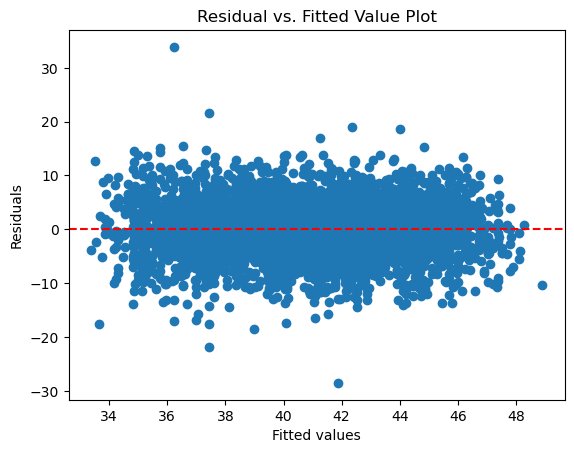

Durbin-Watson: 1.9742145502834296
Breusch-Pagan test: LM Statistic = 87.54921405389626, LM-Test p-value = 4.103982240623252e-13


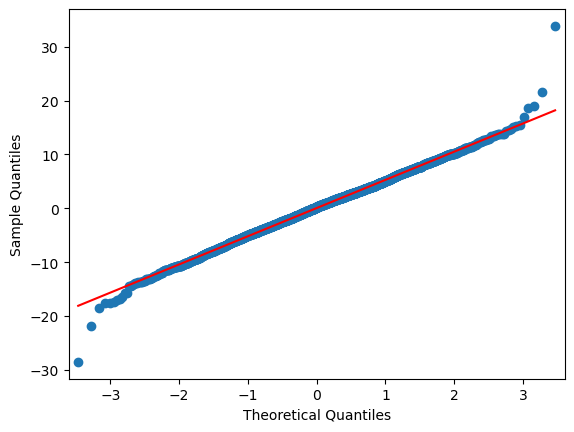

Anderson-Darling Test: Statistic = 1.2320341039776395
At significance level 15.0, data does not look normal (Reject H0)
At significance level 10.0, data does not look normal (Reject H0)
At significance level 5.0, data does not look normal (Reject H0)
At significance level 2.5, data does not look normal (Reject H0)
At significance level 1.0, data does not look normal (Reject H0)


In [53]:
residuals = y_test - y_pred_EN

# Linearity - Residual Plot
plt.scatter(y_pred_EN, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual vs. Fitted Value Plot")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# Independence - Durbin-Watson
dw = sm.stats.durbin_watson(residuals)
print("Durbin-Watson:", dw)

# Homoscedasticity - Breusch-Pagan
bp_test = sms.het_breuschpagan(residuals, sm.add_constant(X_test))
print(f"Breusch-Pagan test: LM Statistic = {bp_test[0]}, LM-Test p-value = {bp_test[1]}")

# Normality - QQ-Plot and Shapiro-Wilk
sm.qqplot(residuals, line='s')
plt.show()

shapiro_test = shapiro(residuals)
#print(f"Shapiro-Wilk Test: W = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

from scipy.stats import kstest, anderson

# For the Kolmogorov-Smirnov test
ks_statistic, ks_p_value = kstest(residuals, 'norm')
#print(f"K-S Test: Statistic = {ks_statistic}, p-value = {ks_p_value}")
result = anderson(residuals, dist='norm')
print(f"Anderson-Darling Test: Statistic = {result.statistic}")
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print(f"At significance level {sl}, data looks normal (Fail to reject H0)")
    else:
        print(f"At significance level {sl}, data does not look normal (Reject H0)")

## Random Forrest

In [77]:
# Suppress the UserWarning
warnings.filterwarnings(action='ignore', category=UserWarning)

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), X_train.columns)
    ], 
    remainder='passthrough'
)

# Initialize the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=123, oob_score=True))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred_RF_test = pipeline.predict(X_test)

# Evaluation on the test set
mse_RF_test = mean_squared_error(y_test, y_pred_RF_test)
r2_RF_test = r2_score(y_test, y_pred_RF_test)

print(f"Test MSE: {mse_RF_test}")
print(f"Test R^2: {r2_RF_test}")

# Predictions on the validation set
y_pred_RF_val = pipeline.predict(X_val)

# Evaluation on the validation set
mse_RF_val = mean_squared_error(y_val, y_pred_RF_val)
r2_RF_val = r2_score(y_val, y_pred_RF_val)

print(f"Validation MSE: {mse_RF_val}")
print(f"Validation R^2: {r2_RF_val}")

print(rf_model.feature_importances_)
print(perm_importance.importances_mean)

Test MSE: 29.07533397971745
Test R^2: 0.21822799546882876
Validation MSE: 28.212850445825605
Validation R^2: 0.2266001659178698
[0.00198419 0.08518625 0.06294101 0.35106315 0.0078459  0.01116553
 0.01051575 0.014294   0.11857097 0.23143278 0.0042949  0.05332444
 0.04738114]
[ 0.          0.          0.00247534 -0.00029051  0.          0.
  0.          0.02829403  0.26438621  0.11371991  0.         -0.03385105
  0.        ]


In [78]:
# Calculate Permutation Importance
rf_model = pipeline.named_steps['random_forest']  # Extract the trained random forest model from the pipeline
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=30, random_state=123)
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), perm_importance.importances_mean[sorted_idx])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx], rotation=45)
plt.ylabel('Permutation Importance')

plt.tight_layout()
#plt.show()

# Optional saving of figure
plt.savefig('Random Forrest perm_importance.png', dpi=300, bbox_inches='tight')
plt.close()

In [56]:
"""
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Residuals plot
residuals_RF = y_test - y_pred_RF
plt.scatter(y_pred_RF, residuals_RF)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted values for Random Forest")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# OOB Score (Only if you set oob_score=True in the Random Forest Regressor)
if hasattr(rf, "oob_score_"):
    print("OOB Score:", rf.oob_score_)
"""

'\nimportances = rf.feature_importances_\nindices = np.argsort(importances)[::-1]\n\nplt.figure(figsize=(10, 6))\nplt.title("Feature Importances")\nplt.bar(range(X_train.shape[1]), importances[indices], align="center")\nplt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)\nplt.xlim([-1, X_train.shape[1]])\nplt.show()\n\n# Residuals plot\nresiduals_RF = y_test - y_pred_RF\nplt.scatter(y_pred_RF, residuals_RF)\nplt.axhline(0, color=\'red\', linestyle=\'--\')\nplt.title("Residuals vs. Fitted values for Random Forest")\nplt.xlabel("Fitted values")\nplt.ylabel("Residuals")\nplt.show()\n\n# OOB Score (Only if you set oob_score=True in the Random Forest Regressor)\nif hasattr(rf, "oob_score_"):\n    print("OOB Score:", rf.oob_score_)\n'

## OLS

In [57]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Create a pipeline for preprocessing
preprocessor = Pipeline([
    ('scaler', StandardScaler())
])

# Fit on training data and transform both train and test sets
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
X_val_transformed = preprocessor.transform(X_val)

# Convert back to DataFrame and assign original column names
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_train.columns)
X_val_transformed = pd.DataFrame(X_val_transformed, columns=X_train.columns)

# Adding constant to the transformed data
X_train_const = sm.add_constant(X_train_transformed)
X_test_const = sm.add_constant(X_test_transformed)
X_val_const = sm.add_constant(X_val_transformed)

# Reset index of y_train
y_train_reset = y_train.reset_index(drop=True)

# Fit the OLS model first without robust standard errors
ols_model = sm.OLS(y_train_reset, X_train_const).fit()

# Get results with robust standard errors
robust_results = ols_model.get_robustcov_results(cov_type='HC3')  

print(robust_results.summary())

y_pred_OLS_test = robust_results.predict(X_test_const)
mae_test = mean_absolute_error(y_test, y_pred_OLS_test)
mse_test = mean_squared_error(y_test, y_pred_OLS_test)
r2_test = r2_score(y_test, y_pred_OLS_test)

print(f"Test MAE: {mae_test:.2f}")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test R-squared: {r2_test:.2f}")

# Prediction and Evaluation on the validation set
y_pred_OLS_val = robust_results.predict(X_val_const)
mae_val = mean_absolute_error(y_val, y_pred_OLS_val)
mse_val = mean_squared_error(y_val, y_pred_OLS_val)
r2_val = r2_score(y_val, y_pred_OLS_val)

print(f"Validation MAE: {mae_val:.2f}")
print(f"Validation MSE: {mse_val:.2f}")
print(f"Validation R-squared: {r2_val:.2f}")



#robust_results = ols_model.get_robustcov_results(cov_type='HC3')
float_format = "%.3f"
summary_table = robust_results.summary2(float_format=float_format).tables[1]
print(summary_table.to_latex())

# Print the results in LaTeX format
#latex_output = robust_results.summary().as_latex()
#print(latex_output)

                            OLS Regression Results                            
Dep. Variable:                    LIX   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     480.5
Date:                Tue, 22 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:22:32   Log-Likelihood:                -54149.
No. Observations:               17673   AIC:                         1.083e+05
Df Residuals:                   17659   BIC:                         1.084e+05
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     40

C:\Users\B164306\AppData\Local\Temp\ipykernel_9896\71712024.py:61: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(summary_table.to_latex())


In [58]:
residuals_OLS = y_test - y_pred_OLS

# 1. Linearity - Residual Plot
plt.scatter(y_pred_OLS, residuals_OLS)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residual vs. Fitted Value Plot for OLS")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

# 2. Independence - Durbin-Watson
dw = sm.stats.durbin_watson(residuals_OLS)
print("Durbin-Watson:", dw)

# 3. Homoscedasticity
# Breusch-Pagan
bp_test = sms.het_breuschpagan(residuals_OLS, X_test_const)
print(f"Breusch-Pagan test: LM Statistic = {bp_test[0]}, LM-Test p-value = {bp_test[1]}")

# White's test
white_test = sms.diagnostic.het_white(residuals_OLS, X_test_const)
print(f"White's test: LM Statistic = {white_test[0]}, LM-Test p-value = {white_test[1]}")

# Goldfeld-Quandt
gq_test = sms.diagnostic.het_goldfeldquandt(y_test, X_test_const)
print(f"Goldfeld-Quandt test: F Statistic = {gq_test[0]}, p-value = {gq_test[1]}")

# 4. Multicollinearity - VIF
vif_data = [variance_inflation_factor(X_train_const.values, i) for i in range(X_train_const.shape[1])]
vif = pd.DataFrame({'VIF': vif_data}, index=X_train_const.columns)
print(vif)

# 5. Normality - QQ-Plot and Shapiro-Wilk
sm.qqplot(residuals_OLS, line='s')
plt.show()

shapiro_test = shapiro(residuals_OLS)
print(f"Shapiro-Wilk Test: W = {shapiro_test[0]}, p-value = {shapiro_test[1]}")

NameError: name 'y_pred_OLS' is not defined

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Extract confidence intervals for OLS
ols_ci = robust_results.conf_int(alpha=0.05)  # 95% CI

# Convert the numpy array to a pandas DataFrame
coeff_names = [row[0] for row in robust_results.summary().tables[1].data][1:]
ols_ci_df = pd.DataFrame(ols_ci, index=coeff_names, columns=['Lower', 'Upper'])

# Drop the constant
ols_ci_df = ols_ci_df.drop('const', errors='ignore')

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

whisker_length = 0.2  # Adjust this value if you want longer or shorter whiskers

# For each feature, plot the intervals for both OLS and Elastic Net
for i, feature in enumerate(feature_names):
    # OLS intervals
    ax.plot([i, i], ols_ci_df.loc[feature], color='blue', label='OLS' if i == 0 else "")
    ax.hlines(ols_ci_df.loc[feature], xmin=i-whisker_length, xmax=i+whisker_length, color='blue')
    
    # Elastic Net intervals
    ax.plot([i, i], [lower_bound[i], upper_bound[i]], color='red', label='Elastic Net' if i == 0 else "")
    ax.hlines([lower_bound[i], upper_bound[i]], xmin=i-whisker_length, xmax=i+whisker_length, color='red')

ax.xaxis.set_ticks(np.arange(len(feature_names)))
ax.set_xticklabels(feature_names, rotation=45, ha='right')  # Rotating for better visibility

ax.set_ylabel('Coefficient Value')
ax.legend(loc='upper right')

plt.tight_layout()
#plt.show()

# Optional saving of figure
plt.savefig('confidence_intervals_comparison.png', dpi=300, bbox_inches='tight')
plt.close()

## LASSO

In [33]:
import numpy as np
from sklearn.utils import resample

# Initial setup
n_bootstrap = 1000
alpha_value = 1.0
degree = 3

# Place to store bootstrap coefficient estimates
bootstrap_coefs = []

for _ in tqdm(range(n_bootstrap)):
    X_resampled, y_resampled = resample(X_train, y_train)
    
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("poly", PolynomialFeatures(degree)),
        ("lasso", Lasso(alpha=alpha_value))
    ])
    
    pipe.fit(X_resampled, y_resampled)
    bootstrap_coefs.append(pipe.named_steps["lasso"].coef_)

# Convert the list into a numpy array for easy indexing/slicing
bootstrap_coefs = np.array(bootstrap_coefs)

# Compute the lower and upper percentiles for each coefficient
lower_bounds = np.percentile(bootstrap_coefs, 2.5, axis=0)
upper_bounds = np.percentile(bootstrap_coefs, 97.5, axis=0)

y_test_pred = pipe.predict(X_test)
y_val_pred = pipe.predict(X_val)

mse_test_Lasso = mean_squared_error(y_test, y_test_pred)
mse_val_Lasso = mean_squared_error(y_val, y_val_pred)

r2_test_Lasso = pipe.score(X_test, y_test)
r2_val_Lasso = pipe.score(X_val, y_val)

# Print R^2 values
print(f"Test MSE: {mse_test_Lasso:.3f}")
print(f"Validation MSE: {mse_val_Lasso:.3f}")
print('\n')
print(f"Test R^2: {r2_test_Lasso:.3f}")
print(f"Validation R^2: {r2_val_Lasso:.3f}")
print('\n')

# Print the confidence intervals for coefficients greater than zero
se_coefs = np.std(bootstrap_coefs, axis=0)
t_stats = np.where(se_coefs != 0, pipe.named_steps["lasso"].coef_ / se_coefs, 0)
p_values = 2 * (1 - norm.cdf(np.abs(t_stats)))
feature_names = pipe.named_steps["poly"].get_feature_names_out(input_features=X_train.columns)

for feature, coef, lower, upper, se, p in zip(feature_names, pipe.named_steps["lasso"].coef_, lower_bounds, upper_bounds, se_coefs, p_values):
    if coef != 0:  # Only print if the coefficient estimate is not 0
        print(f"{feature} {coef:.3f} {se:.3f} {p:.5f} [{lower:.3f} {upper:.3f}]")

  0%|          | 0/1000 [00:00<?, ?it/s]

Test MSE: 28.113
Validation MSE: 27.343


Test R^2: 0.244
Validation R^2: 0.250


Live^3 0.000 0.000 0.94475 [-0.000 0.000]
Live^2 Time_group -0.001 0.002 0.73798 [-0.006 0.000]
Live^2 Category_Politik -0.003 0.001 0.01070 [-0.003 0.000]
Live^2 Category_Udland 0.001 0.001 0.44727 [0.000 0.005]
Live^2 IsBoy 0.000 0.001 0.58399 [-0.000 0.002]
LIX_Headline^3 0.125 0.012 0.00000 [0.089 0.135]
LIX_Headline Category_Vejr^2 0.006 0.015 0.68513 [0.000 0.049]
Category_Business^3 0.007 0.001 0.00000 [0.004 0.008]
Category_Krimi^3 -0.001 0.001 0.18281 [-0.003 0.000]
Category_Politik^3 0.035 0.004 0.00000 [0.025 0.041]
Category_Sport^3 -0.363 0.017 0.00000 [-0.397 -0.329]
Category_Sport^2 IsBoy -0.265 0.024 0.00000 [-0.362 -0.269]
Category_Udland^3 0.439 0.017 0.00000 [0.374 0.439]
Category_Underholdning^3 -0.001 0.000 0.00000 [-0.001 -0.000]
Category_Vejr^3 -0.172 0.013 0.00000 [-0.200 -0.149]


C:\Users\B164306\AppData\Local\Temp\ipykernel_9896\542869515.py:50: RuntimeWarning: invalid value encountered in divide
  t_stats = np.where(se_coefs != 0, pipe.named_steps["lasso"].coef_ / se_coefs, 0)
